In [73]:
import pandas as pd

In [38]:
jan_df = pd.read_csv('../Jan15_Apr17_hate.csv')
apr_df = pd.read_csv('../Apr17_Jul7_hate.csv')
jul_df = pd.read_csv('../Jul8_Aug7_hate.csv')
class_df = pd.read_csv('../covid-hate/data/classified/all_classifications.csv')
geo_df = pd.read_csv('../covid-hate/data/geolocated/geolocations.csv')

In [39]:
print(jan_df.shape)
print(apr_df.shape)
print(jul_df.shape)
print(class_df.shape)
print(geo_df.shape)

(19973244, 2)
(2563060, 6)
(667312, 6)
(30929269, 2)
(6548323, 8)


In [171]:
jan_dates = pd.merge(jan_df, class_df, on='Tweet ID', how='left').dropna()

In [176]:
other_dates = pd.concat([apr_df, jul_df])[['Tweet ID', 'Created At', 'Label']]

In [178]:
comb_dates = pd.concat([jan_dates, other_dates])

In [34]:
time_df = pd.concat([jan_df, apr_df, jul_df])[['Tweet ID', 'Created At']]
print(time_df.shape)
print(time_df.head())

(23203616, 2)
              Tweet ID                      Created At
0  1214688200028909568  Tue Jan 07 23:20:09 +0000 2020
1  1214607404555366400  Tue Jan 07 17:59:06 +0000 2020
2  1214674946238091264  Tue Jan 07 22:27:29 +0000 2020
3  1214482674842079232  Tue Jan 07 09:43:28 +0000 2020
4  1214379297772883968  Tue Jan 07 02:52:41 +0000 2020


In [35]:
all_df = pd.merge(time_df, class_df, on='Tweet ID', how='left').dropna()

In [36]:
print(all_df.shape)
print(all_df.head())

(11580563, 3)
                 Tweet ID                      Created At    Label
3103  1242513753733808128  Tue Mar 24 18:08:58 +0000 2020     Hate
3104  1242420844111917056  Tue Mar 24 11:59:46 +0000 2020  Neutral
3105  1242521583622574080  Tue Mar 24 18:40:05 +0000 2020  Neutral
3106  1242432191138648064  Tue Mar 24 12:44:52 +0000 2020  Neutral
3107  1242280806711611392  Tue Mar 24 02:43:19 +0000 2020     Hate


In [40]:
all_geo_df = pd.merge(geo_df, all_df, on='Tweet ID', how='left').dropna()

In [192]:
print(all_geo_df.shape)
print(all_geo_df.head())

(6551639, 10)
              Tweet ID             User ID Country        State  \
0  1242420844111917056  980248194280972288      in    Rajasthan   
1  1242414608608083968  720588875417128960      gb      England   
2  1242480439157293056          1590022039      us      Florida   
3  1242437817910865920              932781      us  Mississippi   
4  1242402932718473216           760883833      us      Florida   

             County           City   Latitude  Longitude  \
0    Makrana Tehsil           None  27.038810  74.727117   
1             Essex           None  51.796699   0.579337   
2   Pinellas County  Pinellas Park  27.842803 -82.699544   
3   Harrison County     Long Beach  30.350475 -89.152818   
4  Highlands County        Sebring  27.495745 -81.441042   

                       Created At    Label  
0  Tue Mar 24 11:59:46 +0000 2020  Neutral  
1  Tue Mar 24 11:35:00 +0000 2020  Neutral  
2  Tue Mar 24 15:56:35 +0000 2020  Neutral  
3  Tue Mar 24 13:07:13 +0000 2020  Neutral

In [189]:
print('All Hate:', all_df[all_df.Label == 'Hate'].shape[0])
print('All Counter Hate:',all_df[all_df.Label == 'Counterhate'].shape[0])
print('Geo Hate:', all_geo_df[all_geo_df.Label == 'Hate'].shape[0])
print('Geo Counter Hate:',all_geo_df[all_geo_df.Label == 'Counterhate'].shape[0])
print('All Hate:', comb_dates[comb_dates.Label == 'Hate'].shape[0])
print('All Counter Hate:',comb_dates[comb_dates.Label == 'Counterhate'].shape[0])

All Hate: 360148
All Counter Hate: 75352
Geo Hate: 168633
Geo Counter Hate: 38841
All Hate: 886638
All Counter Hate: 109278


In [69]:
N = 1000000
seed = 1
all_df_sample = all_df.sample(n=N, random_state=seed)
geo_df_sample = all_geo_df.sample(n=N, random_state=seed)

In [184]:
comb_sample = comb_dates.sample(n=N, random_state=seed)

In [185]:
comb_sample['Created At'] = pd.to_datetime(comb_sample['Created At'])
comb_sample['Day'] = comb_sample['Created At'].dt.dayofyear

In [70]:
all_df_sample['Created At'] = pd.to_datetime(all_df_sample['Created At'])
all_df_sample['Week'] = all_df_sample['Created At'].dt.isocalendar().week
geo_df_sample['Created At'] = pd.to_datetime(geo_df_sample['Created At'])
geo_df_sample['Week'] = geo_df_sample['Created At'].dt.isocalendar().week

In [107]:
all_df_sample['Day'] = all_df_sample['Created At'].dt.dayofyear
geo_df_sample['Day'] = geo_df_sample['Created At'].dt.dayofyear

In [71]:
all_df_sample.head()
print('All Sample Size:', all_df_sample.shape)
print('All Sample Hate:', all_df_sample[all_df_sample.Label == 'Hate'].shape[0])
print('All Sample Counter Hate:', all_df_sample[all_df_sample.Label == 'Counterhate'].shape[0])
print('All Sample Counter Hate:', all_df_sample[all_df_sample.Label == 'Neutral'].shape[0])

geo_df_sample.head()
print('Geo Sample Size:', geo_df_sample.shape)
print('Geo Sample Hate:', geo_df_sample[geo_df_sample.Label == 'Hate'].shape[0])
print('Geo Sample Counter Hate:', geo_df_sample[geo_df_sample.Label == 'Counterhate'].shape[0])
print('Geo Sample Counter Hate:', geo_df_sample[geo_df_sample.Label == 'Neutral'].shape[0])

All Sample Size: (1000000, 4)
All Sample Hate: 31110
All Sample Counter Hate: 6508
All Sample Counter Hate: 863244
Geo Sample Size: (1000000, 11)
Geo Sample Hate: 25658
Geo Sample Counter Hate: 6078
Geo Sample Counter Hate: 878235


In [186]:
all_tweets_over_time_df = comb_sample.groupby(['Day', 'Label']).count().reset_index().pivot('Day', 'Label', 'Tweet ID')

<AxesSubplot:xlabel='Day'>

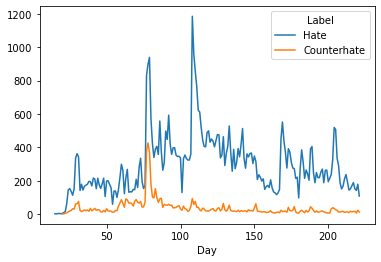

In [187]:
all_tweets_over_time_df.plot(y=['Hate', 'Counterhate'])

In [109]:
hate = geo_df_sample[geo_df_sample.Label == 'Hate']
counter = geo_df_sample[geo_df_sample.Label == 'Counterhate']

In [151]:
tweets_over_time_df = geo_df_sample.groupby(['Day', 'Label']).count().reset_index().pivot('Day', 'Label', 'Tweet ID')
# cum_tweets_over_time_df = geo_df_sample.groupby(['Day', 'Label']).cumcount().reset_index().pivot('Day', 'Label', 'Tweet ID')

<AxesSubplot:xlabel='Day'>

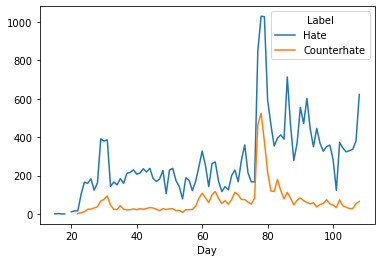

In [155]:
tweets_over_time_df.plot(y=['Hate', 'Counterhate'])

In [158]:
us_hate = hate[hate.Country == 'us']
us_geo_hate_over_time_df = us_hate.groupby(['Day', 'State']).count().reset_index().pivot('Day', 'State', 'Tweet ID')
us_counter = counter[counter.Country == 'us']
us_geo_counter_over_time_df = us_counter.groupby(['Day', 'State']).count().reset_index().pivot('Day', 'State', 'Tweet ID')

<AxesSubplot:xlabel='Day'>

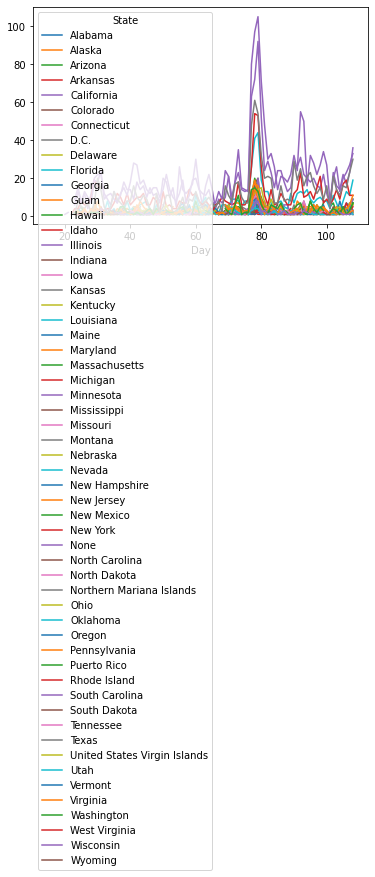

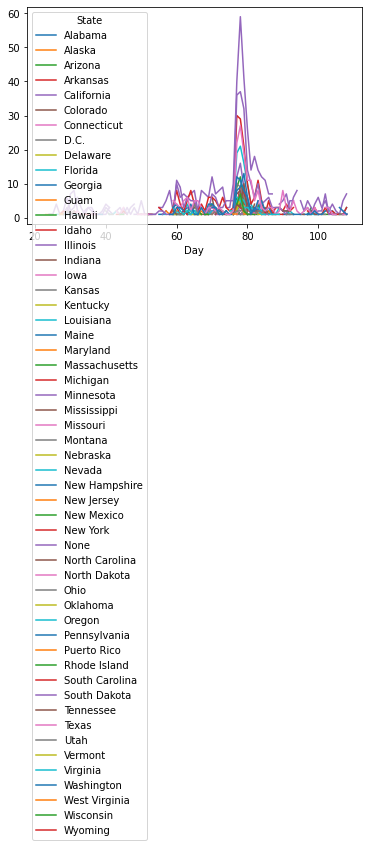

In [159]:
us_geo_hate_over_time_df.plot()
us_geo_counter_over_time_df.plot()

In [161]:
tweets_over_time_df.to_json('../jsons/Tweets_Time.json', orient='index')
us_geo_hate_over_time_df.to_json('../jsons/US_Geo_Hate.json', orient='index')
us_geo_counter_over_time_df.to_json('../jsons/US_Geo_Counter.json', orient='index')

In [188]:
all_tweets_over_time_df.to_json('../jsons/Tweets_Jan_Aug.json', orient='index')